# Pengolahan Andat Modul 3

dalam modul ini akan dilakukan pengolahan untuk 
- Tugas 1 **Plot FFT** dari temperatur vertikal kedalaman 1- 200 meter di titik 0N 156E dari tahun 1996 - 2006, 
- Tugas 2 **Plot Low-pass Filter** data temperature vertikal kedalaman 1 - 200 meter dengan periode cut-off 3 bulan & **plot hovmoller** sst waktu terhadap kedalaman 1 - 500 meter 
- Tugas 3 **Plot Low-pass Filter dan FFT** data ADCP Gondol 2019 dengan periode cut off 3 jam & 
- Tugas 4 **Plot Lag korelasi ONI dan SST** (MATLAB)
- Tugas 5 **Plot Wavelet Spektrum SST dan ONI** (MATLAB)
- Tugas 6 **Plot Wavelet Spektrum SST dan ONI** 

Author(s) :
Salbi Faza Rinaldi (12917009)

Revision history 18/09/2020

# Tugas 1
###  Script FFT

In [1]:
import numpy as np
import matplotlib.pyplot as plt

angin = np.loadtxt('T(z)_1.txt', dtype=None) # ubah sesuai input file*
n = len(angin) # Jumlah data

In [2]:
Ts = 30 # Sampling periode dalam hari 
# Ts = 3600*24*30 # Sampling Periode dalam detik*
Fs = 1 / Ts # Sampling frekuensi
dt = np.arange(0, n * Ts, Ts) 

x1= np.arange(0, dt.max()+Ts, dt.max()/10)
xlabels1 = np.arange(1996, 2007, 1)

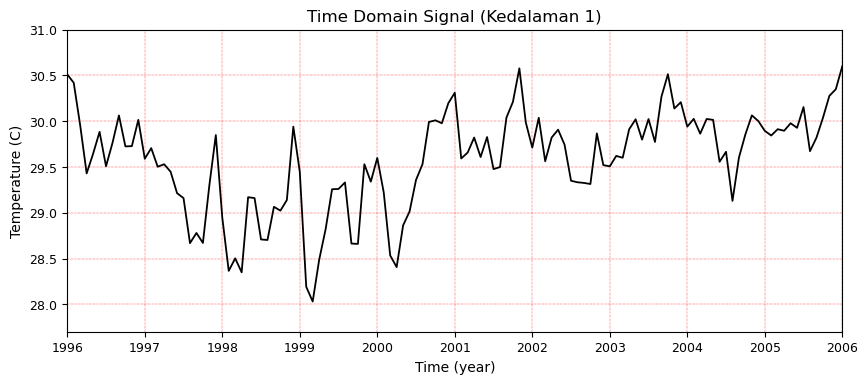

In [3]:
# Plot Data Time Domain Signal 
fig, ax = plt.subplots(figsize=(10,4),dpi=100)
ax.plot(dt, angin, color ='k', lw = 1.3)

ax.set_title('Time Domain Signal (Kedalaman 1)') # Ubah sesuai judul plot data*
ax.set_xlabel('Time (year)', fontweight='light')
ax.set_ylabel('Temperature (C)', fontweight='light')
ax.set(xlim = (0,dt.max()), ylim =(27.7,31))

ax.grid(color='r', ls = '-.', lw = 0.25)
plt.xticks(x1, xlabels1,fontsize = 9)
plt.yticks(fontsize = 9)
# plt.savefig('TimeDomainSignal_1m.png', dpi=900)
plt.show()

In [4]:
import matplotlib.pyplot as plt
import scipy.fft as fft

fft_angin = fft.fft(angin,n) # FFT data angin
fff_angin = fft_angin[0:int(n/2)] # Pemotongan Mirror Signal
fff_angin = fff_angin/fft_angin.max()
xfft = Fs/n*np.arange(1,n/2)
pfft = (1./xfft)/Ts # Periode

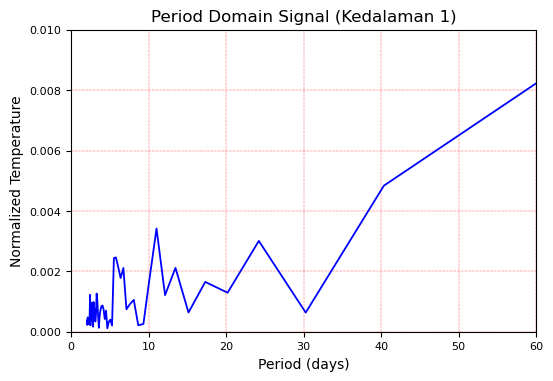

In [5]:
# Plot data
fig, ax = plt.subplots(figsize=(6,4),dpi=100)
ax.plot(pfft,abs(fff_angin),color='b', lw = 1.3)

ax.set_title('Period Domain Signal (Kedalaman 1)') # Ubah sesuai judul plot data*
ax.set_xlabel('Period (days)', fontweight='light')
ax.set_ylabel('Normalized Temperature', fontweight='light')

ax.set(xlim=(0,60),ylim=(0,0.01))
ax.grid(color='r', ls = '-.', lw = 0.25)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8) 
# plt.savefig('PeriodDomainSignal_1m.png', dpi=900)
plt.show()

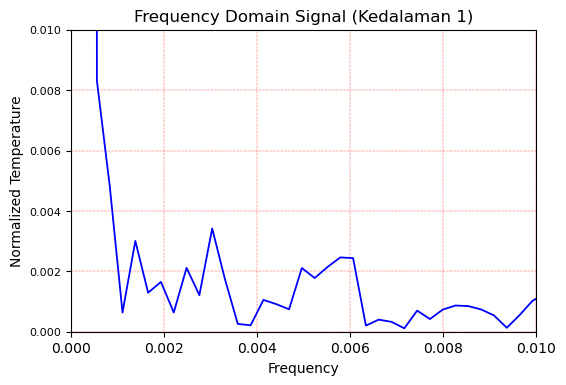

In [6]:
# Plot data
fig, ax = plt.subplots(figsize=(6,4),dpi=100)
ax.plot(xfft,abs(fff_angin), color = 'b', lw = 1.3)

ax.set_title('Frequency Domain Signal (Kedalaman 1)') # Ubah sesuai judul plot data
ax.set_xlabel('Frequency')
ax.set_ylabel('Normalized Temperature')
ax.grid(color='r', ls = '-.', lw = 0.25)

axlim , aylim = (0,0.01), (0,0.01)
x2 = np.arange(0,axlim[1]+(axlim[1]/10),axlim[1]/10)
xlabels2 = np.arange(0,11,1)

ax.set(xlim=axlim,ylim=aylim)
# plt.xticks(x2,xlabels2, fontsize=8)
plt.yticks(fontsize=8)
plt.savefig('Tes.png', dpi=900)
plt.show()

# Tugas 2

### Script Depth-Time

In [7]:
import numpy as np
import matplotlib.pyplot as plt

St = np.loadtxt('Hovmuller.txt')
Depth = np.loadtxt('Depth.txt')
Time = np.loadtxt('Time.txt')

Temp = St.reshape(11,121)
Temp2 = np.flipud(Temp)
Temp2 = np.fliplr(Temp2)

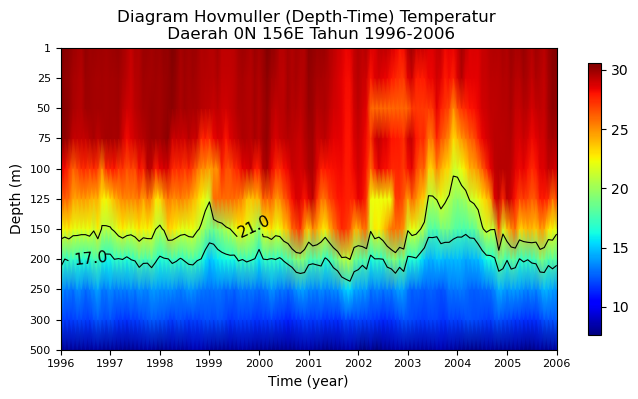

In [8]:
# Plot Data
fig, ax = plt.subplots(figsize=(8,4),dpi=100)
im = ax.pcolormesh(Temp2, shading='gouraud',cmap='jet')
cs = plt.contour(Temp2, [17,21], colors='k',linewidths=.8)

y1 = np.arange(0,11,1)
x1 = np.arange(0,121,12)
y1label = [500,300,250,200,150, 125, 100, 75, 50, 25, 1]
x1label = np.arange(1996,2007,1)

fig.colorbar(im,ax=ax, shrink = .9)

ax.set_title('Diagram Hovmuller (Depth-Time) Temperatur \n Daerah 0N 156E Tahun 1996-2006')
ax.set(xlabel=('Time (year)'), ylabel = ('Depth (m)'))
plt.xticks(x1,x1label,fontsize=8)
plt.yticks(y1,y1label,fontsize=8)
plt.clabel(cs, fmt = '%2.1f', fontsize=11)
# plt.savefig('Tes.png', dpi=900)
plt.show()

### Script Low-Pass-Filter

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

data = np.loadtxt('T(z)_1.txt')

Ts = 3600*24*30 # periode pengambilan data dalam sekon
fs = 1/Ts  # Frekuensi sampling, satuan Hz

fc = 1/(3600*24*90)  # Frekuensi cut-off = 3 bulan, satuan 1/s atau Hz
w = fc / (fs / 2) # Normalisasi frekuensi

b, a = signal.butter(5, w, 'low') # desain filter untuk 'low pass'
elevasi_filter = signal.filtfilt(b, a, data) # implementasi filter ke data

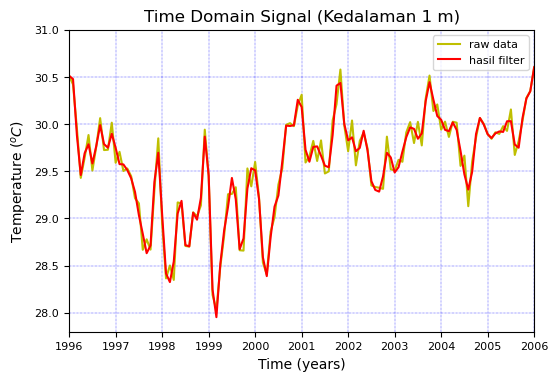

In [10]:
# Plot Data
fig, ax = plt.subplots(dpi=100)
ax.plot(data,color = 'y', label='raw data')
ax.plot(elevasi_filter,color = 'r', label='hasil filter')
ax.legend(loc='best',fontsize=8)

ax.set(xlim=(0,120),ylim=(27.8,31))
ax.set(xlabel = ('Time (years)'), ylabel = ('Temperature $(^oC)$'))
ax.set_title('Time Domain Signal (Kedalaman 1 m)')
ax.grid(color='b', ls = '-.', lw = 0.25)

x = np.arange(0,121,12)
xlabel = np.arange(1996,2007,1)

plt.xticks(x,xlabel, fontsize=8)
plt.yticks(fontsize=8)
# plt.savefig('Tes.png', dpi=900)
plt.show()

# Tugas 3
### Script Low-pass Filter

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

data = np.loadtxt('T(z)_1.txt')

Ts = 3600*24*30 # periode pengambilan data dalam sekon
fs = 1/Ts  # Frekuensi sampling, satuan Hz

fc = 1/(3600*24*90)  # Frekuensi cut-off = 3 bulan, satuan 1/s atau Hz
w = fc / (fs / 2) # Normalisasi frekuensi

b, a = signal.butter(5, w, 'low') # desain filter untuk 'low pass'
elevasi_filter = signal.filtfilt(b, a, data) # implementasi filter ke data

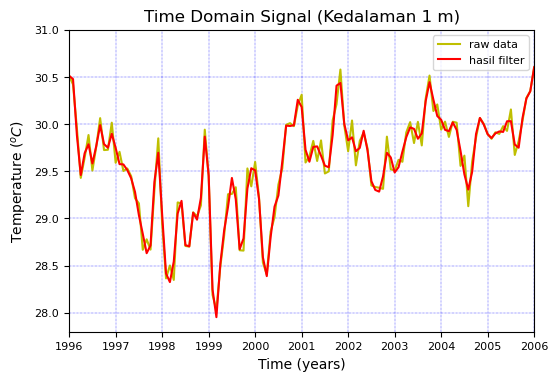

In [12]:
# Plot Data
fig, ax = plt.subplots(dpi=100)
ax.plot(data,color = 'y', label='raw data')
ax.plot(elevasi_filter,color = 'r', label='hasil filter')
ax.legend(loc='best',fontsize=8)

ax.set(xlim=(0,120),ylim=(27.8,31))
ax.set(xlabel = ('Time (years)'), ylabel = ('Temperature $(^oC)$'))
ax.set_title('Time Domain Signal (Kedalaman 1 m)')
ax.grid(color='b', ls = '-.', lw = 0.25)

x = np.arange(0,121,12)
xlabel = np.arange(1996,2007,1)

plt.xticks(x,xlabel, fontsize=8)
plt.yticks(fontsize=8)
# plt.savefig('Tes.png', dpi=900)
plt.show()

### Script FFT

In [13]:
import numpy as np
import matplotlib.pyplot as plt

angin = np.loadtxt('T(z)_1.txt', dtype=None) # ubah sesuai input file*
n = len(angin) # Jumlah data

In [14]:
Ts = 30 # Sampling periode dalam hari 
# Ts = 3600*24*30 # Sampling Periode dalam detik*
Fs = 1 / Ts # Sampling frekuensi
dt = np.arange(0, n * Ts, Ts) 

x1= np.arange(0, dt.max()+Ts, dt.max()/10)
xlabels1 = np.arange(1996, 2007, 1)

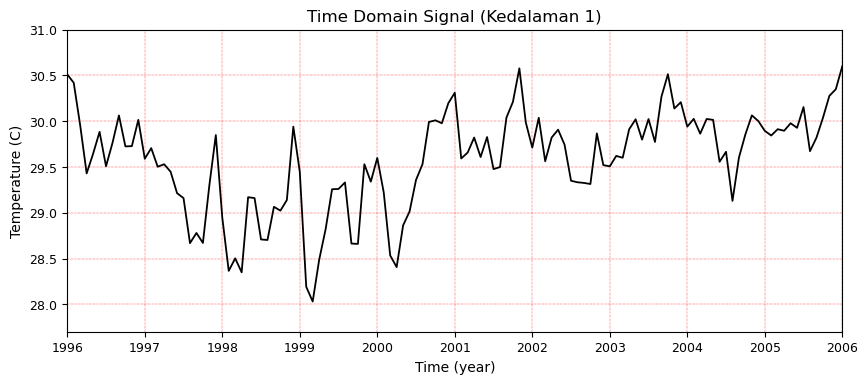

In [15]:
# Plot Data Time Domain Signal 
fig, ax = plt.subplots(figsize=(10,4),dpi=100)
ax.plot(dt, angin, color ='k', lw = 1.3)

ax.set_title('Time Domain Signal (Kedalaman 1)') # Ubah sesuai judul plot data*
ax.set_xlabel('Time (year)', fontweight='light')
ax.set_ylabel('Temperature (C)', fontweight='light')
ax.set(xlim = (0,dt.max()), ylim =(27.7,31))

ax.grid(color='r', ls = '-.', lw = 0.25)
plt.xticks(x1, xlabels1,fontsize = 9)
plt.yticks(fontsize = 9)
# plt.savefig('TimeDomainSignal_1m.png', dpi=900)
plt.show()

In [16]:
import matplotlib.pyplot as plt
import scipy.fft as fft

fft_angin = fft.fft(angin,n) # FFT data angin
fff_angin = fft_angin[0:int(n/2)] # Pemotongan Mirror Signal
fff_angin = fff_angin/fft_angin.max()
xfft = Fs/n*np.arange(1,n/2)
pfft = (1./xfft)/Ts # Periode

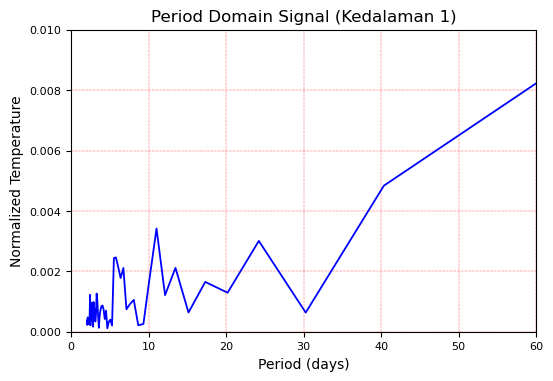

In [17]:
# Plot data
fig, ax = plt.subplots(figsize=(6,4),dpi=100)
ax.plot(pfft,abs(fff_angin),color='b', lw = 1.3)

ax.set_title('Period Domain Signal (Kedalaman 1)') # Ubah sesuai judul plot data*
ax.set_xlabel('Period (days)', fontweight='light')
ax.set_ylabel('Normalized Temperature', fontweight='light')

ax.set(xlim=(0,60),ylim=(0,0.01))
ax.grid(color='r', ls = '-.', lw = 0.25)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8) 
# plt.savefig('PeriodDomainSignal_1m.png', dpi=900)
plt.show()

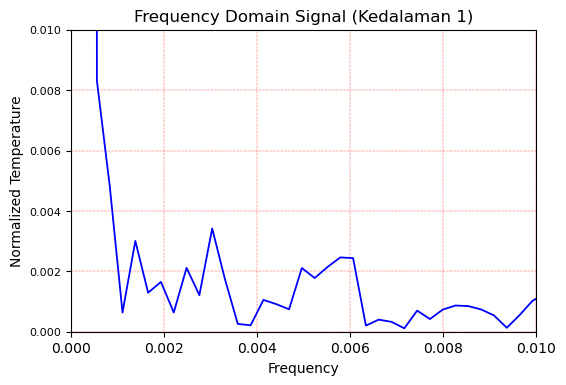

In [18]:
# Plot data
fig, ax = plt.subplots(figsize=(6,4),dpi=100)
ax.plot(xfft,abs(fff_angin), color = 'b', lw = 1.3)

ax.set_title('Frequency Domain Signal (Kedalaman 1)') # Ubah sesuai judul plot data
ax.set_xlabel('Frequency')
ax.set_ylabel('Normalized Temperature')
ax.grid(color='r', ls = '-.', lw = 0.25)

axlim , aylim = (0,0.01), (0,0.01)
x2 = np.arange(0,axlim[1]+(axlim[1]/10),axlim[1]/10)
xlabels2 = np.arange(0,11,1)

ax.set(xlim=axlim,ylim=aylim)
# plt.xticks(x2,xlabels2, fontsize=8)
plt.yticks(fontsize=8)
plt.savefig('Tes.png', dpi=900)
plt.show()

# Tugas 6 (Bonus)

Prequest 
1. install pycwt
 - 

In [19]:
from __future__ import division
import numpy
from matplotlib import pyplot

import pycwt as wavelet
from pycwt.helpers import find

In [20]:
url = 'http://paos.colorado.edu/research/wavelets/wave_idl/nino3sst.txt'
dat = numpy.genfromtxt(url, skip_header=19)
# dat = numpy.loadtxt('ONI_Salbi.txt')
title = 'NINO3 Sea Surface Temperature'
label = 'NINO3 SST'
units = 'degC'
t0 = 1871.0
# t0 = 1996
# dt = 0.083
dt = 0.25  # In years

In [21]:
N = dat.size
t = numpy.arange(0, N) * dt + t0

In [22]:
p = numpy.polyfit(t - t0, dat, 1)
dat_notrend = dat - numpy.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset

In [23]:
mother = wavelet.Morlet(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

In [24]:
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

In [25]:
power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

In [26]:
# power /= scales[:, None]

In [27]:
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

In [28]:
glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

In [29]:
sel = find((period >= 2) & (period < 8))
Cdelta = mother.cdelta
scale_avg = (scales * numpy.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
                                             significance_level=0.95,
                                             dof=[scales[sel[0]],
                                                  scales[sel[-1]]],
                                             wavelet=mother)

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


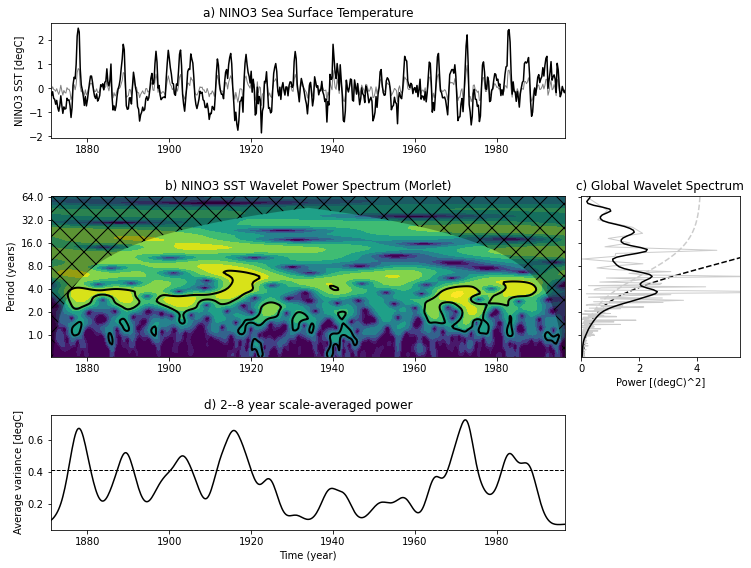

In [30]:
# Prepare the figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = pyplot.figure(**figprops)

# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, dat, 'k', linewidth=1.5)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                           numpy.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (years)')
#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                           numpy.ceil(numpy.log2(period.max())))
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = pyplot.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, numpy.log2(period), 'k--')
cx.plot(var * fft_theor, numpy.log2(period), '--', color='#cccccc')
cx.plot(var * fft_power, numpy.log2(1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
cx.plot(var * glbl_power, numpy.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(numpy.log2([period.min(), period.max()]))
cx.set_yticks(numpy.log2(Yticks))
cx.set_yticklabels(Yticks)
pyplot.setp(cx.get_yticklabels(), visible=False)

# Fourth sub-plot, the scale averaged wavelet spectrum.
dx = pyplot.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
dx.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
dx.plot(t, scale_avg, 'k-', linewidth=1.5)
dx.set_title('d) {}--{} year scale-averaged power'.format(2, 8))
dx.set_xlabel('Time (year)')
dx.set_ylabel(r'Average variance [{}]'.format(units))
ax.set_xlim([t.min(), t.max()])

pyplot.show()